In [50]:
#import dependencies

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

import pandas as pd
import numpy as np

import matplotlib
matplotlib.style.use('ggplot')

In [51]:
#set up variable to csv for pandas plotting

clean_weather = 'clean_weather.csv'
hawaii_df = pd.read_csv(clean_weather)
hawaii_df = hawaii_df.drop('Unnamed: 0', 1)

#create engine to hawaii, inspect table

engine = create_engine("sqlite:///hawaii_db.sqlite", echo=False)
inspector = inspect(engine)
inspector.get_table_names()

['hawaii_db']

In [55]:
#testing session


[('USC00511918'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00516128'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519281'),
 ('USC00519397'),
 ('USC00519523')]

In [56]:
hawaii_df.head(-1)

,station,date,prcp,tobs,name,latitude,longitude,elevation
0,USC00519397,2010-01-01,0.08,65,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,USC00519397,2010-01-02,0.00,63,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,USC00519397,2010-01-03,0.00,74,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,USC00519397,2010-01-04,0.00,76,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
4,USC00519397,2010-01-06,0.00,73,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
5,USC00519397,2010-01-07,0.06,70,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
6,USC00519397,2010-01-08,0.00,64,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
7,USC00519397,2010-01-09,0.00,68,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
8,USC00519397,2010-01-10,0.00,73,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
9,USC00519397,2010-01-11,0.01,64,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0


In [108]:
#set up parameters for df plotting,

filtered_year_hawaii_df = hawaii_df[(hawaii_df['date'] >= '2016-08-22') & (hawaii_df['date'] <= '2017-08-22')]
prcp_year_df = filtered_year_hawaii_df[['date', 'prcp']].set_index('date')
prcp_year_df.head()

,prcp
date,
2016-08-22,0.40
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00


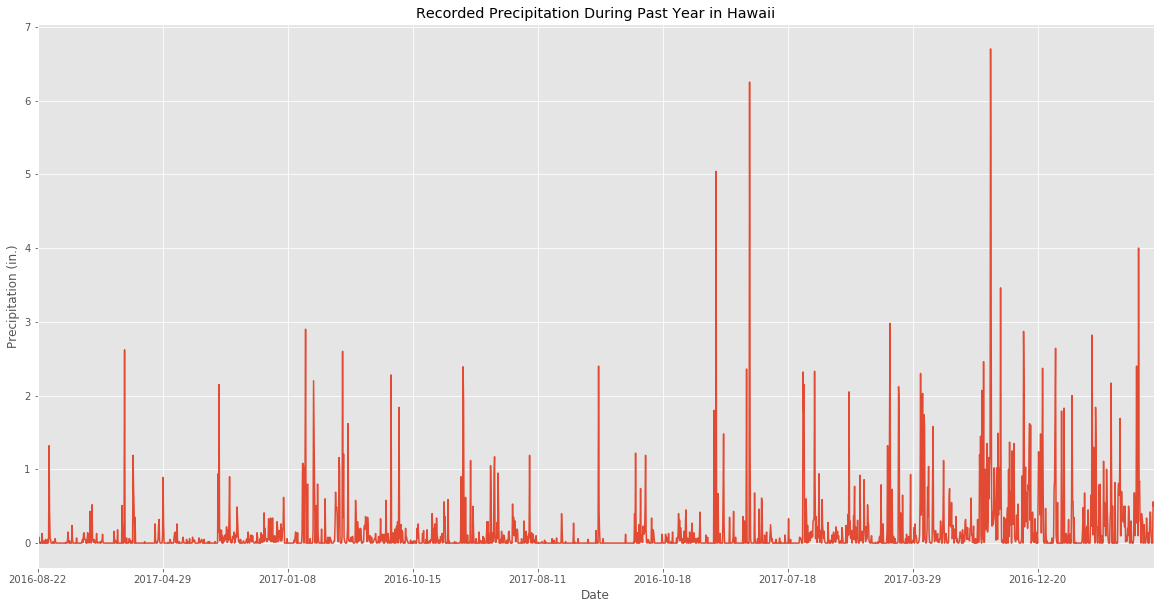

In [145]:
#not sure why matplot is plotting like this.  
#The dataframe shows up in order, yet the axis comes out all scrambled.  
#I used the x_compat=True as the homework creator suggested...need to move on to next plot

ax = prcp_year_df.plot(x_compat=True, figsize = (20,10), title='Recorded Precipitation During Past Year in Hawaii')
ax.set_xlabel('Date')
ax.set_ylabel("Precipitation (in.)")
ax.legend().set_visible(False)
plt.show()

In [115]:
# get column names and data types

columns = inspector.get_columns('hawaii_db')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs INTEGER
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [126]:
#automap instead of creating a class

Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()
Hawaii = Base.classes.hawaii_db

#create session

session = Session(engine)

In [141]:
#testing engine

active_stations = session.query(Hawaii.station, func.count(Hawaii.tobs)).\
        group_by(Hawaii.station).order_by(func.count(Hawaii.station).desc())

list(active_stations)


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [149]:
active_station = session.query(Hawaii.tobs, func.count(Hawaii.tobs)).\
    filter(Hawaii.station == 'USC00519281').\
    group_by(Hawaii.tobs).all()
    
active_station
    

[(54, 1),
 (56, 4),
 (57, 6),
 (58, 6),
 (59, 5),
 (60, 15),
 (61, 19),
 (62, 37),
 (63, 33),
 (64, 41),
 (65, 71),
 (66, 80),
 (67, 111),
 (68, 143),
 (69, 193),
 (70, 227),
 (71, 265),
 (72, 290),
 (73, 278),
 (74, 261),
 (75, 204),
 (76, 148),
 (77, 111),
 (78, 88),
 (79, 54),
 (80, 43),
 (81, 22),
 (82, 11),
 (83, 3),
 (84, 1),
 (85, 1)]

In [ ]:
def calc_temps(start_date,end_date):